# Lista 2 (7 pkt.)

In [1]:
import string
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Zadanie 1. (1 pkt)
To zadanie należy wykonać ręcznie, bez używania komputera, korzystając z instrukcji z wykładu. Zaszyfruj wiadomość o treści: "NEW 15 HELICOPTERS.", za pomocą klucza: 68496 47757 10126 36660 25066. Do słów, które są tabeli poniżej użyj odpowiednio ich kodów. Uwaga: w wiadomości jest liczba mnoga "helicopterS".


$\begin{array}{|c|c|c|c|c|c|c|c|c|c|}
\hline
CODE&A&E&I&N&O&T&&\\
0&1&2&3&4&5&6&&&\\
\hline
B&C&D&F&G&H&J&K&L&M\\
70&71&72&73&74&75&76&77&78&79\\
\hline
P&Q&R&S&U&V&W&X&Y&Z\\
80&81&82&83&84&85&86&87&88&89\\
\hline
FIG&.&:&,/'&(/)&+&-&=&REG/?&SPC\\
90&91&92&93&94&95&96&97&98&99\\
\hline
\end{array}$

$\begin{array}{|cc|cc|cc|cc|}
\hline
000&ABORT&253&DECODE&505&MILITARY&758&STREET\\
\hline
019&ACCEPT&262&DELAY&514&MONEY&767&SUBWAY\\
\hline
028&ACCESS&271&DIFFICULT&523&MONTH&776&SUCCESS\\
\hline
037&ADDRESS&280&DOCUMENT&532&MORNING&785&SUPPLY\\
\hline
046&AFFIRMATIVE&299&ENCODE&541&MORSE&794&SUPPORT\\
\hline
055&AGENT&307&EVENING&550&NEGATIVE&802&TELEPHONE\\
\hline
064&AIRPLANE&316&EXECUTE&569&NIGHT&811&TODAY\\
\hline
073&AIRPORT&325&FACTORY&578&OBSERVATION&820&TOMORROW\\
\hline
082&ANSWER&334&FAILED&587&PASSPORT&839&TRAIN\\
\hline
091&AUTHORITY&343&FERRY&596&PERSON&848&TRANSFER\\
\hline
109&BETWEEN&352&FLIGHT&604&PHOTOGRAPH&857&TRANSMIT\\
\hline
118&BORDER&361&FREQUENCY&613&POSITIVE&866&TRAVEL\\
\hline
127&BUILDING&370&HARBOUR&622&POSSIBLE&875&TRUCK\\
\hline
136&CANCEL&389&HELICOPTER&631&POWER&884&UNABLE TO\\
\hline
145&CHANGE&398&HIGHWAY&640&PRIORITY&893&URGENT\\
\hline
154&CIVILIAN&406&IDENTITY&659&PROBLEM&901&VERIFY\\
\hline
163&COMPROMISE&415&IMMEDIATE&668&QUESTION&910&WEEK\\
\hline
172&COMPUTER&424&IMPOSSIBLE&677&RADIO&929&WITHIN\\
\hline
181&CONFIRM&433&INFORMATION&686&RECEIVE&938&YESTERDAY\\
\hline
190&CONTACT&442&INSTRUCTIONS&695&RENDEZVOUS&&\\
\hline
208&COORDINATE&451&LOCATE&703&REPEAT&&\\
\hline
217&COUNTRY&460&LOCATION&712&RESERVATION&&\\
\hline
226&COVERT&479&MAIL&721&ROUTINE&\\
\hline
235&CURRENT&488&MEETING&730&SATELLITE&\\
\hline
244&DANGER&497&MESSAGE&749&SHIP&\\
\hline
\end{array}$

### Rozwiązanie:

```
NEW 15 HELICPOTERS = 42869 91115 55990 38983
KOD =          68496 47757 10126 36660 25066
wynik =        68496 05112 81019 29330 13927
```

## Zadanie 2 (1 pkt)
To zadanie również jest do zrobienia ręcznie. Na stronie internetowej kursu akapit tekstu w sekcji "Wykład" oraz akapit w sekcji "Labolatorium" zawiera wiadomość zakodowaną metodą WPS (Words Per Sentence). Odkoduj ją przy użyciu klucza otrzymanego na zajęciach.

### Rozwiązanie
```
       273|27060743
       273|25800707
wiad:  ---|42860440 -> NEW ??? (INSTRUCTIONS?) 
```

## Zadanie 3. (1 pkt)
Wczytaj obrazki 'miki.png' oraz 'quest.png'.

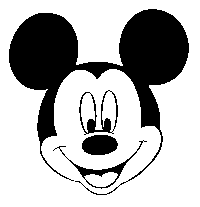

In [2]:
img1 = Image.open('miki.png').convert('L')
img1

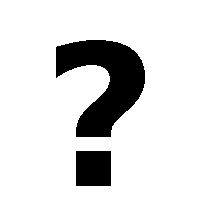

In [3]:
img2 = Image.open('quest.png').convert('L')
img2

Napisz funkcję add_pic(img1, img2), która przyjmuje dwa obrazki i je dodaje piksel po pikselu za pomocą XOR, czyli biały+biały=czarny, biały+czarny=biały, czarny+czarny=czarny. Warto wykorzystać to, że np.array(img) zwraca tablicę, z wartościami 255 dla białych pikseli i 0 dla czarnych, aby zamienić tablicę z powrotem na obraz należy użyc Image.fromarray() przy czym tablica musi być typu np.uint8 czyli na tworząc tablicę podajemy typ: np.array([1,2,3,4], dtype=np.uint8). Funkcja ma zwracać obrazek.

In [4]:
def add_pic(img1, img2):
    img1_arr = np.array(img1, dtype=np.uint8)
    img2_arr = np.array(img2, dtype=np.uint8)
    
    for x in range(img2_arr.shape[0]):
        for y in range(img2_arr.shape[1]):
            img1_arr[x][y] = img1_arr[x][y] ^ img2_arr[x][y]
            
    return Image.fromarray(img1_arr)   

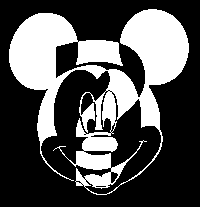

In [5]:
add_pic(img1, img2)

In [6]:
def gen_key():
    key = np.zeros(shape=(207,200), dtype=np.uint8)
    for x in range(key.shape[0]):
        for y in range(key.shape[1]):
            key[x][y] = np.random.randint(0,255)
    
    return Image.fromarray(key)

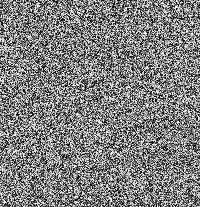

In [7]:
key = gen_key()
key

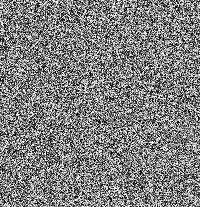

In [8]:
img1_enc = add_pic(img1, key)
img1_enc

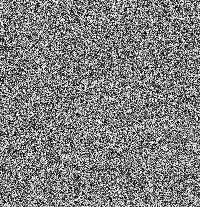

In [9]:
img2_enc = add_pic(img2, key)
img2_enc

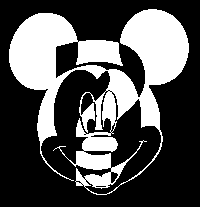

In [10]:
add_pic(img1_enc, img2_enc)

Wygeneruj (pseudo)losowy klucz, czyli obrazek z losowymi białymi i czarnymi pikselami, użyj np.random. Następnie zaszyfruj tym kluczem, za pomocą add_pic, oba obrazki img1 i img2. Zauważ, że oba obrazki wyglądają na dobrze zaszyfrowane, zobacz jednak co się wydarzy kiedy dodasz do siebie te zaszyfrowane obrazki.

## Zadanie 4 (2 pkt.)
Zmienne masg1_enc oraz msg2_enc zawierają dwie zaszyfrowane wiadomości, w jezyku angielskim.

In [11]:
msg1_enc = '\x1e\x17\x0c\x12\x1b\x08\x0cf\x0e\x11x\x1a\x1c\x12o\x06\x18\x1f\x17\x03\x10\x01fkh\x1f\x08'
msg2_enc = '\x0b\ni\x07\x1c\x02k\x1f\x16e\x01\x0b\x07\x03\n\x15\x15\x0c\x1el\x07\x03\x03\x16\x01\x01\x02'

Wiadomo, że zostały zaszyfrowane tym samym kluczem, możemy to wykorzystać do odszyfrowania ich. W tym zadaniu konwencja zamiany liter na liczby i ich dodawania jest inna, niż w poprzednich. Znaki zamieniamy na liczby kodujące te znaki w Unicode, czyli za pomocą ord(), następnie dodajemy je do siebie za pomocą XOR na poziomie bitów, czyli za pomocą ^. Napisz funkcję add_str(msg1, msg2), które przyjmuje dwa teksty i zwraca tekst będący sumą tych tekstóœ zgodnie z powyższą konwencją.

In [12]:
def add_str(msg1, msg2):
    res = ""  
    return res.join([chr(ord(a) ^ ord(b)) for a,b in zip(msg1, msg2)])

In [13]:
xored_msg = add_str(msg1_enc, msg2_enc)

In [14]:
print(add_str('A','1')=='p')
print(add_str('A','A')=='\x00')
print(add_str('A','B')=='\x03')
print(add_str('HSUP','NBVH')=='\x06\x11\x03\x18')
print(add_str('131','FXH')=='wky')

True
True
True
True
True



Zauważmy, że jeżeli dwie wiadomości są zaszyfrowane tym samym kluczem to dodanie ich do siebie sprawia, że dostaniemy sumę wiadomosći bez klucza. Poza tym zauważmy, że jeżeli znamy jakieś słowo występujące w którejś z wiadomości i je dodamy do sumy tych wiadomości w odpowiednim miejscu to w wyniku dostaniemy poprawne słowo z drugiej wiadomości. Zatem metoda łamania tych wiadomości jest następująca, zgadujemy jakie słow może być w którejś z wiadomości, dodajemy je w różnych miejscach sumy wiadomości i patrzymy czy powstaje coś co może być fragmentem poprawnego tekstu, następnie na podstawie tego fragmentu zgadujemy większą pozostałą część słowa i teraz to słowo używamy do odczytania kolejnego fragmentu z pierwszej wiadomości.

Pierwsze słowo wybieramy z pośród najpopularniejszych słów w danym języku.

Najpopularniejsze angielskie słowa:
1. THE
2. BE
3. TO
4. OF
5. AND

Uwaga 1: Słowa zapisane są drukowanymi literami.

Uwaga 2: Słowa oddzialane są spacjami, zatem biorąc np. słowo THE należy sprawdzać ciąg znaków "&nbsp; THE &nbsp;", ze spacjami na początku i końcu, dzięki temu odszyfrujemy więcej znaków.

In [15]:
def check_str(msg_str, guess):
    for x in range(0, len(msg_str)):
        
        if x + len(guess) > len(msg_str):
            break
        m = msg_str[x: x+len(guess)]
        print(add_str(m, guess))

In [16]:
check_str(xored_msg, " THE ")
print("\n-------\n")
check_str(xored_msg, " BE ")
print("\n-------\n")
check_str(xored_msg, " TO ")
print("\n-------\n")
check_str(xored_msg, " OF ")
print("\n-------\n")
check_str(xored_msg, " AND ")
print("\n-------\n")

5I-P'
=1]B*
EAOOG
5SB"Y
'^/<8
*31]T
G-P1Y
YL<<1
8 1T;
T-Y^1
YESTE
1OY 3
;E-V-
11[H3
EGEV)
3Y[LO
-GA*7
3]'R"
);_GE
OCJ ]
7V-8I
"15,>
E)![*

-------

5_ 5
='P'
EWB*
5EOG
'H"Y
*%<8
G;]T
YZ1Y
86<1
T;T;
YS^1
1YTE
;S 3
1'V-
EQH3
3OV)
-QLO
3K*7
)-R"
OUGE
7@ ]
"'8I
E?,>
]+[*

-------

5I*5
=1Z'
EAH*
5SEG
'^(Y
*368
G-WT
YL;Y
8 61
T-^;
YET1
1O^E
;E*3
11\-
EGB3
3Y\)
-GFO
3] 7
);X"
OCME
7V*]
"12I
E)&>
]=Q*

-------

5R#5
=*S'
EZA*
5HLG
'E!Y
*(?8
G6^T
YW2Y
8;?1
T6W;
Y^]1
1TWE
;^#3
1*U-
E\K3
3BU)
-\OO
3F)7
) Q"
OXDE
7M#]
"*;I
E2/>
]&X*

-------

5\+Q'
=$[C*
ETING
5FD#Y
'K)=8
*&7\T
G8V0Y
YY:=1
857U;
T8__1
YPUUE
1Z_!3
;P+W-
1$]I3
ERCW)
3L]MO
-RG+7
3H!S"
).YFE
OVL!]
7C+9I
"$3->
E<'Z*

-------



In [17]:
check_str(xored_msg, " YESTE")
print("\n-------\n")
check_str(xored_msg, "ETING ")

5D FSO
=<PT^"
ELBY3<
5^O4-]
'S"*L1
*><K <
G ]'-T
YA1*E^
8-<BOT
T THE 
YH^B1V
1BT6GH
;H @YV
1<V^GL
EJH@]*
3TVZ;R
-JL<CG
3P*DV 
)6RQ18
ONG6),
7[ .=[
"<8:JO

-------

PI,[@*
X1\IMG
 AND Y
PSC)>8
B^.7_T
O30V3Y
"-Q:>1
<L=7V;
] 0_\1
1-XUVE
<ER_"3
TOX+T-
^E,]J3
T1ZCT)
 GD]NO
VYZG(7
HG@!P"
V]&YEE
L;^L"]
*CK+:I
RV,3.>
G14'Y*


In [18]:
check_str(xored_msg, "YESTERDAY")
print("\n-------\n")
check_str(xored_msg, "MEETING")

LX6ABX#8A
D FSO5=Y-
<PT^"+\5 
LBY3<J08H
^O4-]&=PB
S"*L1+UZH
><K <C_P<
 ]'-TIU$J
A1*E^C!RT
-<BOT7WLJ
 THE AIRP
H^B1V_WH6
BT6GHAM.N
H @YV[+V[
<V^GL=SC<
JH@]*EF$$
TVZ;RP!<0
JL<CG79(G
P*DV /-_S

-------

XX AND 
P PSC)>
(PB^.7_
XBO30V3
JO"-Q:>
G"<L=7V
*<] 0_\
4]1-XUV
U1<ER_"
9<TOX+T
4T^E,]J
\^T1ZCT
VT GD]N
\ VYZG(
(VHG@!P
^HV]&YE
@VL;^L"
^L*CK+:
D*RV,3.
"RG14'Y
ZG ) PM


In [19]:
check_str(xored_msg, " THE AIRPORT ")
print("\n-------\n")
check_str(xored_msg, "XX AND ")

5I-P'K.+H;+E;
=1]B*&0J$6CO1
EAOOG8Q&)^IEE
5SB"YY=+ATC13
'^/<850CK^7G-
*31]T8XIA*AY3
G-P1YPRC5\_G)
YL<<1ZX7CBA]O
8 1T;P,A]\[;7
T-Y^1$Z_CF=C"
YESTERDAY EVE
1OY 3LZ[?XP1]
;E-V-R@=GM7)I
11[H3H&ER*/=>
EGEV).^P52;J*

-------

MEETING
E=5FD#Y
=M'K)=8
M_*&7\T
_RG8V0Y
R?YY:=1
?!857U;
!@T8__1
@,YPUUE
,!1Z_!3
!I;P+W-
IC1$]I3
CIERCW)
I=3L]MO
=K-RG+7
KU3H!S"
UK).YFE
KQOVL!]
Q77C+9I
7O"$3->
OZE<'Z*


In [20]:
check_str(xored_msg, "YESTERDAY EVENING ")
print("\n-------\n")
check_str(xored_msg, "MEETING AT THE AIRPORT ")

LX6ABX#8AT<G^_,]J3
D FSO5=Y-YTMT+ZCT)
<PT^"+\5 1^G ]D]NO
LBY3<J08H;T3VCZG(7
^O4-]&=PB1 EH]@!P"
S"*L1+UZHEV[VG&YEE
><K <C_P<3HEL!^L"]
 ]'-TIU$J-V_*YK+:I
A1*E^C!RT3L9RL,3.>
-<BOT7WLJ)*AG+4'Y*

-------

XX AND YY YESTERDAY EVE
P PSC)>85-1OY 3LZ[?XP1]
(PB^.7_T8E;E-V-R@=GM7)I
XBO30V3YPO11[H3H&ER*/=>
JO"-Q:>1ZEEGEV).^P52;J*


In [21]:
check_str(xored_msg, "XX AND YY YESTERDAY EVENING")

MEETING AT THE AIRPORT 3 PM


In [22]:
check_str(xored_msg, "XX AND YY YESTERDAY EVENING")
check_str(xored_msg, "MEETING AT THE AIRPORT 3 PM")

MEETING AT THE AIRPORT 3 PM
XX AND YY YESTERDAY EVENING


## Zadanie 5 (2 pkt.)

W poprzednim zadaniu korzystaliśmu z faktu, że obie wiadomości były zaszyfrowane przy użyciu tego samego klucza. Jednka w praktyce nie wiemy, które i czy w ogóle, wiadomosci były zaszyfrowane przy użyciu tego samego klucza. Możemy to wykryć dokonując analizy statystycznej. Załóżmy, że dodajemy do siebie dwie wiadomości zaszyfrowane tymi samymi kluczami. Wtedy miejsca w których dostaniemy 0 (w konwencji użytej w tym zadaniu znak odpowiadający 0 w Unicode, czyli chr(0)) są miejscami w których w obu wiadomościach była ta sama litera. Jeżeli natomiast dodajemy wiadomości o różnych kluczach będziemy dostawać 0 w losowych miejscach. Zatem w pierwszym przypadku otrzymamy więcej 0.

Zatem należy wczytać wszystki wiadomości msg1.txt, msg2.txt itd. a następnie dodać je do siebie parami, każda z każdą i policzyć odsetek 0 (tzn. znaków chr(0)) w otrzymanych sumach. Para wiadomości o wyższym niż inne odsetku będzie tą zaszyfrowaną przy u życiu tego samego klucza. Aby łatwiej zauważyć taką parę warto zilustrować sobie wyniki (odsetki 0) za pomocą plt.imshow(cmap,norm=LogNorm()) i użyć skali logarytmicznej.

Ten sam Klucz zostal użyty w 3 i 8 wiadomości
{'name': '3-8', 'chars': 11515, '0': 591}


Na obrazku widać, że dla 3 i 8 mamy największe zagęszczenie


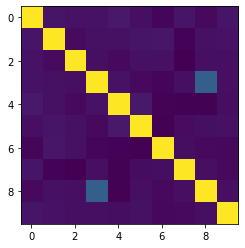

In [23]:
zero = chr(0)

message = []

for i in range(0, 10):
    plik = open('msg' + str(i) + '.txt', encoding="utf8")
    message.append(plik.read())
    plik.close()    
        
added_messages = {}

for i in range(0, 10):
    for j in range(0, 10):
        key_name = '' + str(i) + '-' + str(j) + ''
        if i == j:
            continue
        if key_name[::-1] in added_messages:
            continue
        added_messages[key_name] = add_str(message[i], message[j])

freq_list = []
def check_freq(x, pref):
    return {
        "name": pref,
        "chars": len(x),
        "0": x.count(zero)
    }

maxVal = 0
result = ""
for i in added_messages:
    f = check_freq(added_messages[i], i)
    
    if f["0"] > maxVal:
        maxVal = f["0"]
        result = f
    
    freq_list.append(f)

visualizedata  = np.zeros((10,10))
for i in range(0, 10):
    for j in range(0, 10):
        x = add_str(message[i], message[j])
        visualizedata[i][j] = x.count(zero)

plt.imshow(visualizedata, norm=LogNorm())
plt.show()